In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt

In [6]:
directory = r"D:\ds_files\potato_plant_disease.pic\PlantVillage"

In [12]:
Image_size = 256
Batch_size = 32
EPOCHS = 25

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    shuffle=True,
    image_size=(Image_size, Image_size),
    batch_size=Batch_size
)

NameError: name 'tf' is not defined

In [21]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [23]:
len(dataset)

68

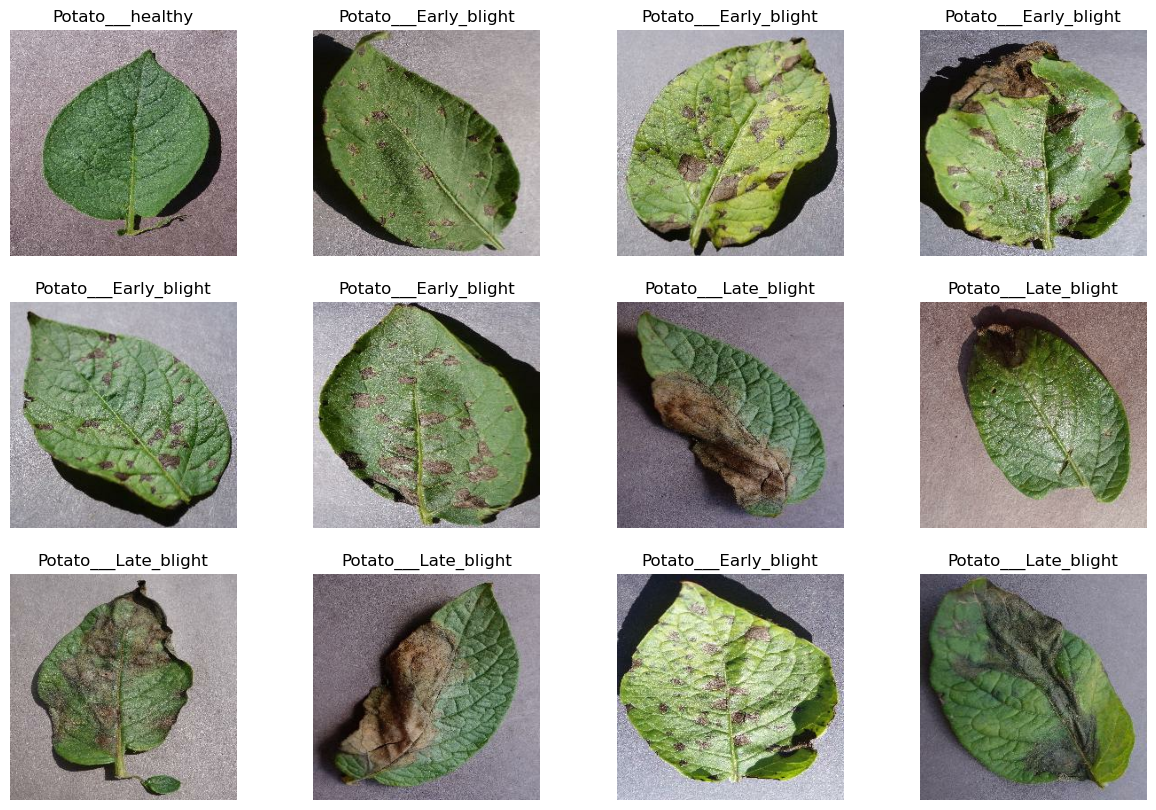

In [39]:
plt.figure(figsize = (15,10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    #To convert from tensor to numpy use .numpy()
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis('off')

In [41]:
def tf_dataset_partitions(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):

  ds_size = len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)

  train_size = int(train_split*ds_size)
  val_size = int(val_split*ds_size)
  test_size = int(test_split*ds_size)

  train_ds = ds.take(train_size)
  remaining_ds = ds.skip(train_size)

  val_ds = remaining_ds.take(val_size)
  test_ds = remaining_ds.skip(test_size)

  return train_ds, val_ds, test_ds

In [43]:
train_ds, val_ds, test_ds = tf_dataset_partitions(dataset)

In [45]:
len(train_ds),len(val_ds),len(test_ds)

(54, 6, 8)

In [47]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [49]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(Image_size, Image_size),
    layers.Rescaling(1./255)
])

In [51]:
data_agumentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [53]:
Channel = 3 #RGB
Image_size = 256 # Example size
input_shape = (Image_size, Image_size, Channel)
n_classes = 3

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(Image_size, Image_size),
    layers.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

model = models.Sequential([
    layers.Input(shape=input_shape),
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=(None, Image_size, Image_size, Channel))

In [55]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 277,891 (1.06 MB)

 Trainable params: 277,891 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [63]:
history = model.fit(train_ds,epochs=EPOCHS, batch_size=Batch_size, verbose=1, validation_data=val_ds)

Epoch 1/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 39s 672ms/step - accuracy: 0.4824 - loss: 0.8999 - val_accuracy: 0.8021 - val_loss: 0.5680
Epoch 2/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 658ms/step - accuracy: 0.7802 - loss: 0.5826 - val_accuracy: 0.7969 - val_loss: 0.5096
Epoch 3/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 647ms/step - accuracy: 0.8468 - loss: 0.3960 - val_accuracy: 0.9010 - val_loss: 0.2161
Epoch 4/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 609ms/step - accuracy: 0.8653 - loss: 0.3138 - val_accuracy: 0.8333 - val_loss: 0.4039
Epoch 5/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 32s 601ms/step - accuracy: 0.8744 - loss: 0.3339 - val_accuracy: 0.8958 - val_loss: 0.2485
Epoch 6/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 612ms/step - accuracy: 0.9362 - loss: 0.1878 - val_accuracy: 0.8177 - val_loss: 0.4737
Epoch 7/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 671ms/step - accuracy: 0.9034 - loss: 0.2310 - val_accuracy: 0.7760 - val_loss: 0.4434
Epoch 8/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 676ms/step - accuracy: 0.9295 - loss: 0.1651 - val_accu

In [65]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step - accuracy: 0.9542 - loss: 0.1320


In [67]:
history

In [69]:
history.params

{'verbose': 1, 'epochs': 25, 'steps': 54}

In [73]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [87]:
import pandas as pd
accuracy = pd.to_numeric(history.history['accuracy'])
val_accuracy = pd.to_numeric(history.history['val_accuracy'])
loss = pd.to_numeric(history.history['loss'])
val_loss = pd.to_numeric(history.history['val_loss'])

In [109]:
def plot_history(history):
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  plt.plot(history.history['accuracy'],color='red',label="accuracy")
  plt.plot(history.history['val_accuracy'],color="blue",label="val_accuracy")
  plt.legend(loc="upper left")

  plt.subplot(1,2,2)
  plt.plot(history.history['loss'],color="red",label="loss")
  plt.plot(history.history['val_loss'],color="blue",label="val_loss")
  plt.legend(loc="upper left")
  plt.show()

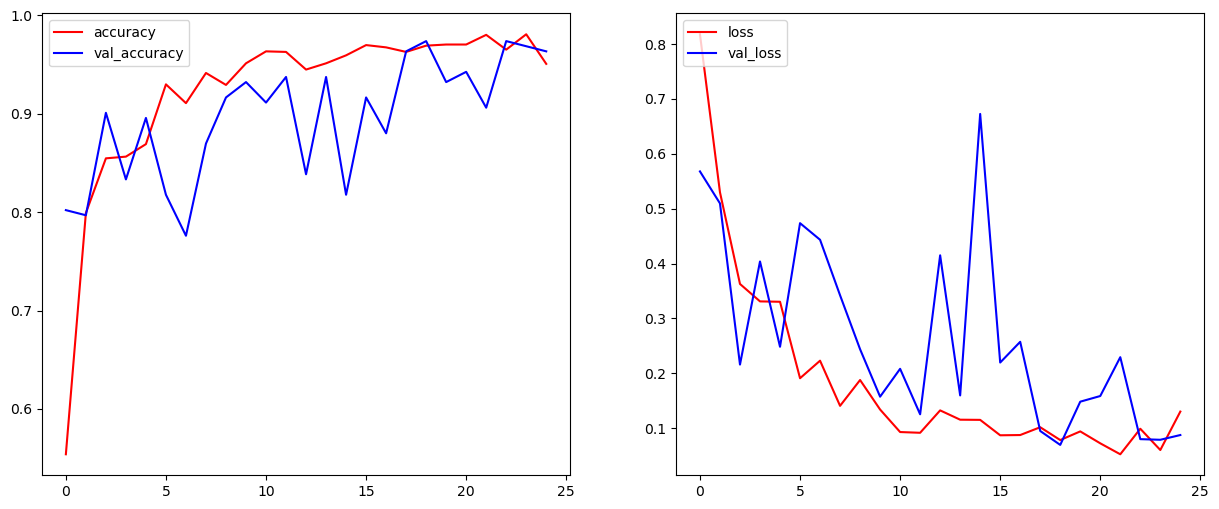

In [111]:
plot_history(history)

first image to predict
actual label Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
predicted label Potato___Late_blight


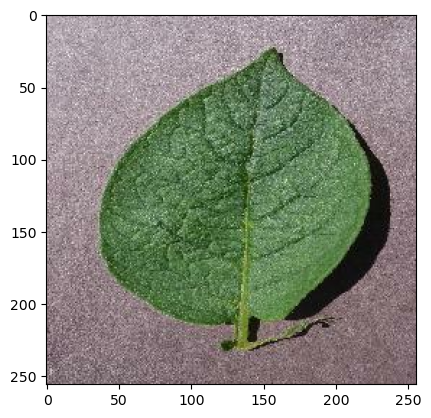

In [121]:
for images_batch, labels_batch in test_ds.take(1):
  first_image = image_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()
  print("first image to predict")
  plt.imshow(first_image)
  print("actual label", class_names[first_label])

  batch_prediction = model.predict(images_batch)
  print("predicted label", class_names[np.argmax(batch_prediction[0])])

In [145]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100*(np.max(predictions[0])),2)
  return predicted_class, confidence

In [2]:
import matplotlib.pyplot as plt

def plot_predictions(test_ds, model):
    for images, labels in test_ds.take(1):
        plt.figure(figsize=(13,13))
        for i in range(9):
            ax = plt.subplot(3,3,i+1)
            plt.imshow(images[i].numpy().astype('uint8'))
            predicted_class, confidence = predict(model, images[i].numpy().astype("uint8"))
            actual_class = class_names[labels[i]]
            plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}%")
            plt.axis("off")
        plt.show()


plot_predictions(test_ds, model)

NameError: name 'test_ds' is not defined